In [21]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import torch
import os
import re
import os
import json
import math

In [22]:
# logs are in directories: llm_thesis_logs/unlearn.py-{params}/train
# and llm_thesis_logs/unlearn.py-{params}/validation
# collect all of the data

# for unlearn.py-params file in llm_thesislogs:
data = []

for exp_dir in (f.path for f in os.scandir('results/llm_thesis_logs') if f.is_dir()):
    params = [(x.split('=')[0],x.split('=')[1]) for x in re.findall('[a-z]+=[a-zA-Z0-9\.-]+', exp_dir)]
    params[6] = ('lrate', params[6][1])
    params = {x[0]:x[1] for x in params}
    with open(exp_dir + '/evaluation_results.jsonl') as f:
        results = json.load(f)
    joined = {**params, **results}
    data.append(joined)

data[0]

{'bs': '4',
 'b': '0.5',
 'd': 'None',
 'e': '20',
 'ee': '5',
 'km': '0.5',
 'lrate': '0.0001',
 'lme': '-1',
 'lr': '10',
 'm': '7B',
 'nm': '1.0',
 'rm': '1.0',
 'sln': 'True',
 'sm': 'True',
 's': '42',
 't': '4',
 'forget-set': {'overall-regurgitation-score': 0.06817143757606607,
  'overall-knowledge-score': 0.003896103896103896,
  'Task1': {'regurgitation-score': 0.1527587949032961, 'knowledge-score': 0.0},
  'Task2': {'regurgitation-score': 0.0, 'knowledge-score': 0.0},
  'Task3': {'regurgitation-score': 0.06997139259237513,
   'knowledge-score': 0.019736842105263157}},
 'retain-set': {'overall-regurgitation-score': 0.975885002380542,
  'overall-knowledge-score': 0.9468911917098446,
  'Task1': {'regurgitation-score': 0.9578167122887485,
   'knowledge-score': 0.883495145631068},
  'Task2': {'regurgitation-score': 0.9933546511801956,
   'knowledge-score': 0.996078431372549},
  'Task3': {'regurgitation-score': 0.9763826734616108,
   'knowledge-score': 0.8301886792452831}},
 'mia_lo

0.5 0.44809618762759335 [0.454351232018231, 0.4312775957840763, 0.4571286141575274, 0.4589089873237431, 0.43946731234866826, 0.44744338413331436]
1.0 0.4435186503980123 [0.4456630109670987, 0.4114086312491098, 0.4701609457342259, 0.46417889189574135, 0.4561316051844467, 0.41810283435408063, 0.435336846603048, 0.4470873095000712, 0.4435977780942886]
0.5 0.6380084954116937 [0.6104865194905186, 0.7281853043517499, 0.665340343372618, 0.5941570758915021, 0.6576935258952262, 0.572188203468548]
1.0 0.46689602127709695 [0.6447718300257724, 0.5373210305650997, 0.5014652475929053, 0.5155361748690562, nan, 0.5403705434494048, 0.4857580477520448, 0.4769241236202117, 0.49991719361937725]
0.5 0.9195559652741547 [0.9455563264533249, 0.9321903172711732, 0.9056444159603266, 0.8516582403507633, 0.9435332653370105, 0.9387532262723296]
1.0 0.7891235917871058 [0.9202684791102187, 0.8867624604461892, 0.8973707970444901, 0.8487976327114272, nan, 0.9154247959941337, 0.8230892966530864, 0.9081010613605638, 0.9

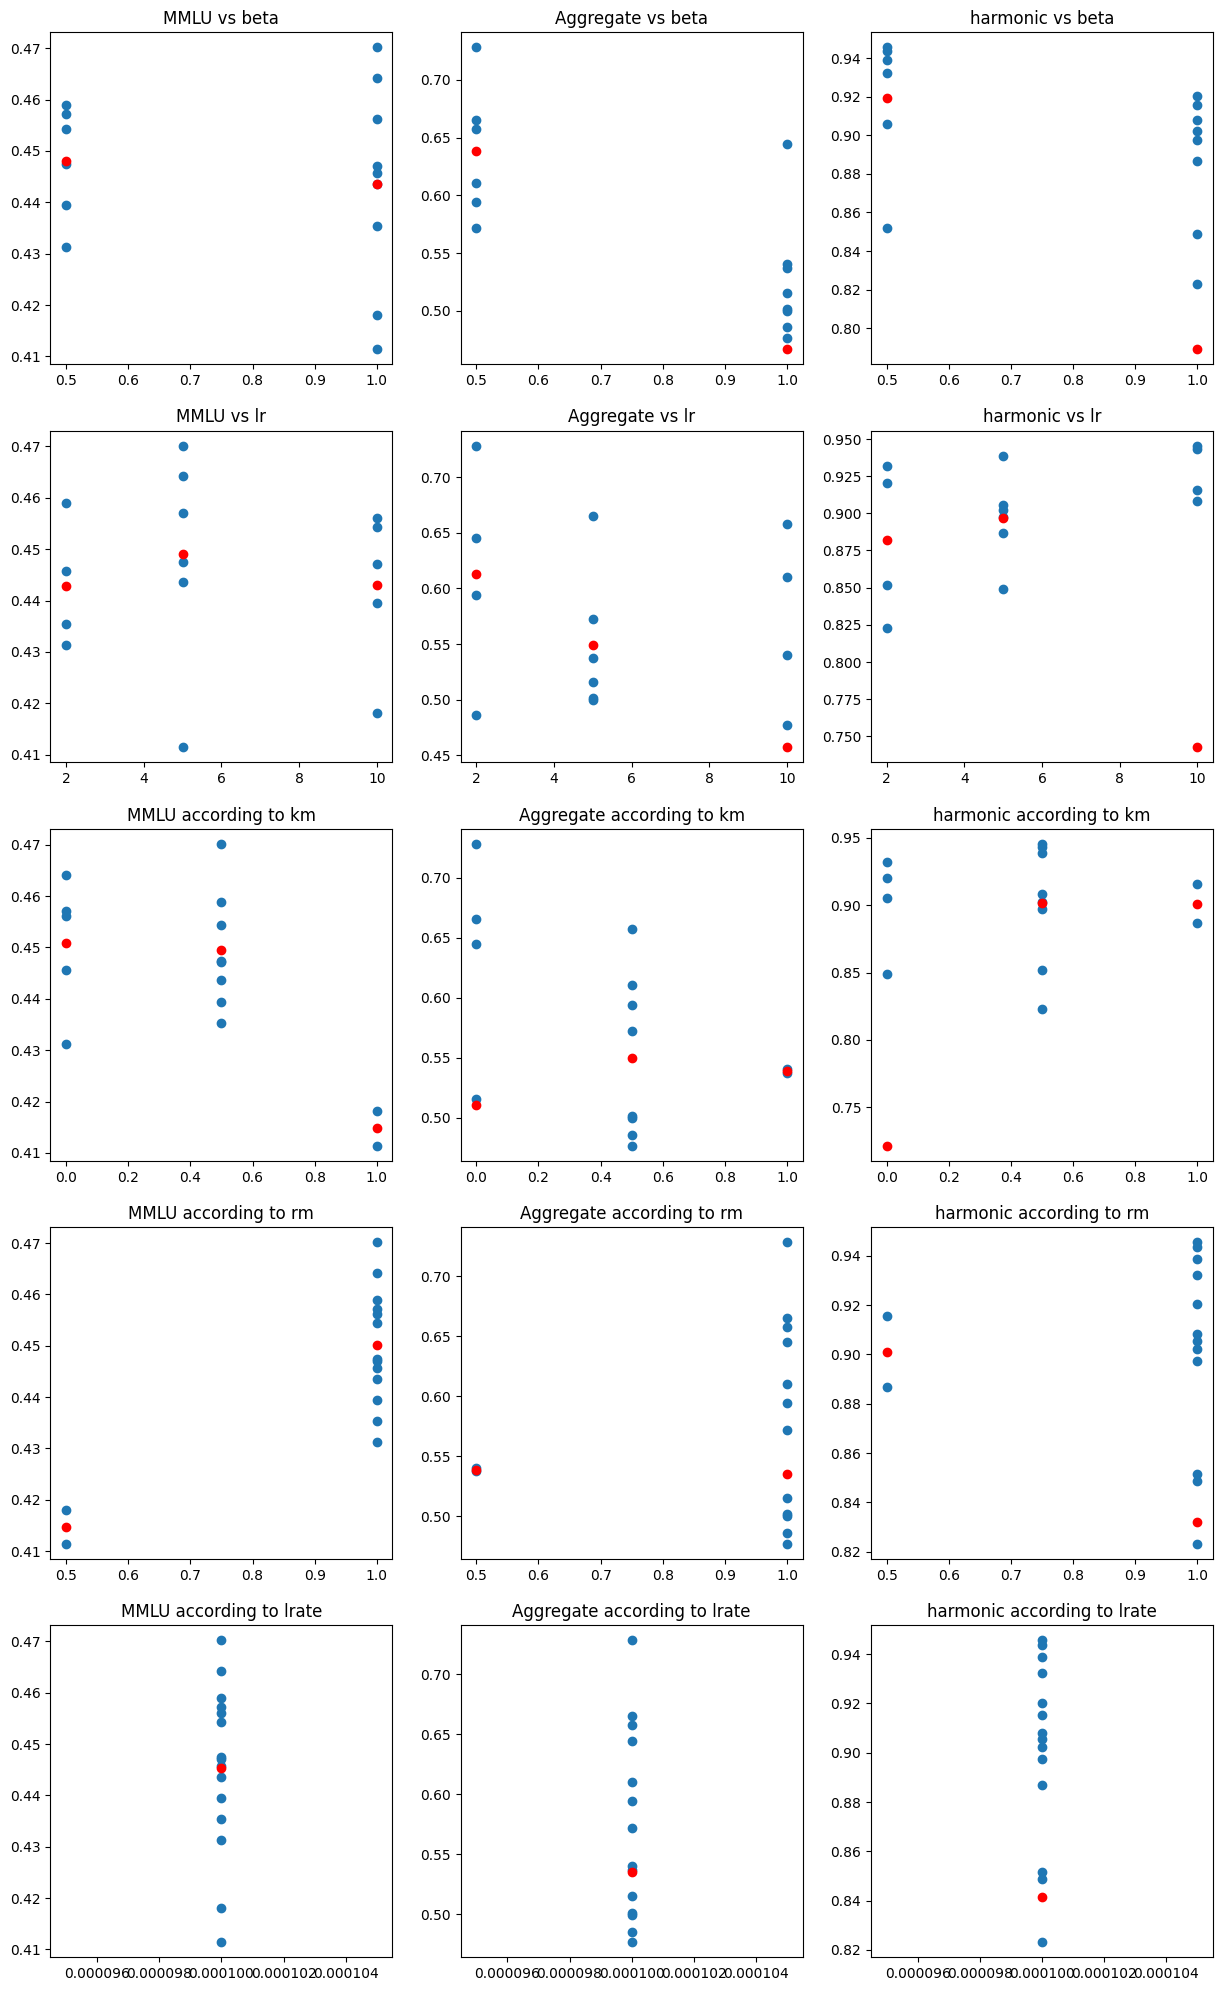

In [27]:
dataf = [d for d in data if d['e'] != '0' and d['lrate'] != '2e-05']

def data_to_axs(data, param, value, ax: plt.Axes, title):
    ax.scatter([float(x[param]) for x in data], [x[value] for x in data], zorder=1)
    for p in set([float(x[param]) for x in data]):
        mean = numpy.mean([x[value] if not math.isnan(x[value]) else 0. for x in data if float(x[param]) == p])
        ax.scatter([p], [mean], c='r', zorder=1000)
    ax.set_title(title)
    
fig, axs = plt.subplots(5, 3, figsize=(15, 25))


data_to_axs(dataf, 'b', 'mmlu_average', axs[0,0], 'MMLU vs beta')
data_to_axs(dataf, 'b', 'aggregate-score', axs[0, 1], 'Aggregate vs beta')
data_to_axs(dataf, 'b', 'harmonic-mean-task-aggregate', axs[0,2], 'harmonic vs beta')

data_to_axs(dataf, 'lr', 'mmlu_average', axs[1,0], 'MMLU vs lr')
data_to_axs(dataf, 'lr', 'aggregate-score', axs[1,1], 'Aggregate vs lr')
data_to_axs(dataf, 'lr', 'harmonic-mean-task-aggregate', axs[1,2], 'harmonic vs lr')

data_to_axs(dataf, 'km', 'mmlu_average', axs[2,0], 'MMLU according to km')
data_to_axs(dataf, 'km', 'aggregate-score', axs[2,1], 'Aggregate according to km')
data_to_axs(dataf, 'km', 'harmonic-mean-task-aggregate', axs[2,2], 'harmonic according to km')

data_to_axs(dataf, 'rm', 'mmlu_average', axs[3,0], 'MMLU according to rm')
data_to_axs(dataf, 'rm', 'aggregate-score', axs[3,1], 'Aggregate according to rm')
data_to_axs(dataf, 'rm', 'harmonic-mean-task-aggregate', axs[3,2], 'harmonic according to rm')

data_to_axs(dataf, 'lrate', 'mmlu_average', axs[4,0], 'MMLU according to lrate')
data_to_axs(dataf, 'lrate', 'aggregate-score', axs[4,1], 'Aggregate according to lrate')
data_to_axs(dataf, 'lrate', 'harmonic-mean-task-aggregate', axs[4,2], 'harmonic according to lrate')


#


In [24]:
# best params on validation score:
best = max(data, key=lambda x: x['harmonic-mean-task-aggregate'])
print(best)

{'bs': '4', 'b': '0.5', 'd': 'None', 'e': '20', 'ee': '5', 'km': '0.5', 'lrate': '0.0001', 'lme': '-1', 'lr': '10', 'm': '7B', 'nm': '1.0', 'rm': '1.0', 'sln': 'True', 'sm': 'True', 's': '42', 't': '4', 'forget-set': {'overall-regurgitation-score': 0.06817143757606607, 'overall-knowledge-score': 0.003896103896103896, 'Task1': {'regurgitation-score': 0.1527587949032961, 'knowledge-score': 0.0}, 'Task2': {'regurgitation-score': 0.0, 'knowledge-score': 0.0}, 'Task3': {'regurgitation-score': 0.06997139259237513, 'knowledge-score': 0.019736842105263157}}, 'retain-set': {'overall-regurgitation-score': 0.975885002380542, 'overall-knowledge-score': 0.9468911917098446, 'Task1': {'regurgitation-score': 0.9578167122887485, 'knowledge-score': 0.883495145631068}, 'Task2': {'regurgitation-score': 0.9933546511801956, 'knowledge-score': 0.996078431372549}, 'Task3': {'regurgitation-score': 0.9763826734616108, 'knowledge-score': 0.8301886792452831}}, 'mia_loss_acc': 0.784224, 'mmlu_average': 0.454351232